Importing some stuff

In [85]:
import numpy as np
import cv2
from utility import *
import matplotlib.pyplot as plt
from iced import normalization
from iced import filter
import os
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
def log(image):
    out = image * 1.
    out[np.where(out <= 0)] = 1
    return np.log(out)

def pearsonII(image):
    out = pearson(image)
    out[np.where(out <= 0)] = 0
    return out

def rel_error(m1 ,m2):
    diff = np.abs(m1 - m2)
    return diff / (np.abs(np.minimum(m1+100, m2+100)))

def print_statistics(m1, text = "", print_results=True):
    max = np.max(m1)
    min = np.min(m1)
    mean = m1.mean()
    median = np.percentile(m1, 50)
    std = m1.std()
    if (print_results):
        print("#-----------------------------------------------------------------------#")
        print("Stats for %s: "% text)
        print("max: %f | min: %f | median: %f | mean: %f | std: %f"%(max, min, median, mean, std))
        print("#-----------------------------------------------------------------------#")
    return max, min, mean, std

def t_test(m1, m2):
    diff = m1 - m2
    n = diff.shape[0] * diff.shape[1]
    std = np.sqrt(np.sum(diff * diff) / (n - 1))
    t0 = diff.mean() * np.sqrt(n) / std
    return t0

def threshold_within_std(m1, k):
    min, max, mean, std = print_statistics(m1, print_results=False)
    return (m1 > mean - k * std) * (m1 < mean + k * std)

Initiating matrices

In [37]:
chr1 = 2
chr2 = chr1
print "chromosome 1: %s, chromosome 2: %s"%(chr1, chr2)
#print observed_mit_original.shape

mit = readMat("../data/extracted_all_contact_MIT/chr_%02d_%02d_500kb.mat"%\
              (chr1, chr2), "\t")
call4 = readMat("../data/extracted_all_contact_call4/chr_%02d_%02d_500kb.mat"%\
                (chr1, chr2), "\t")
rl = readMat("../data/extracted_all_contact_RL/chr_%02d_%02d_500kb.mat"%(chr1, chr2), "\t")

chromosome 1: 2, chromosome 2: 2
file directory: ../data/extracted_all_contact_MIT/chr_02_02_500kb.mat
file directory: ../data/extracted_all_contact_call4/chr_02_02_500kb.mat
file directory: ../data/extracted_all_contact_RL/chr_02_02_500kb.mat


In [38]:
all = readMat("../data/extracted_all_contact_ALL/chr_%02d_%02d_500kb.mat"%(chr1, chr2), "\t")

file directory: ../data/extracted_all_contact_ALL/chr_02_02_500kb.mat


In [39]:
n0, m0 = np.shape(mit)
n1, m1 = np.shape(call4)
n2, m2 = np.shape(rl)
n3, m3 = np.shape(all)

n = np.min([n0, m0, n1, m1, n2, m2, n3, m3])
mit = mit[:n, :n]
call4 = call4[:n, :n]
rl = rl[:n, :n]
all = all[:n, :n]

In [40]:
mit = pearson(scn(normalize(mit)))
call4 = pearson(scn(normalize(call4)))
rl = pearson(scn(normalize(rl)))
print call4.shape

(480, 480)


In [41]:
all = pearson(scn(normalize(rl)))

In [18]:
min, max, mean_mit, std_mit = print_statistics(mit, "mit")
min, max, mean_rl, std_rl = print_statistics(rl, "rl")
min, max, mean_call4, std_call4 = print_statistics(call4, "call4")
min, max, mean_all, std_all = print_statistics(all, "all")

#-----------------------------------------------------------------------#
Stats for mit: 
max: 1.000000 | min: -0.114191 | median: -0.012927 | mean: 0.000900 | std: 0.064145
#-----------------------------------------------------------------------#
#-----------------------------------------------------------------------#
Stats for rl: 
max: 1.000000 | min: -0.038420 | median: -0.002424 | mean: 0.000214 | std: 0.046369
#-----------------------------------------------------------------------#
#-----------------------------------------------------------------------#
Stats for call4: 
max: 1.000000 | min: -0.106534 | median: -0.001830 | mean: 0.000227 | std: 0.046263
#-----------------------------------------------------------------------#
#-----------------------------------------------------------------------#
Stats for all: 
max: 1.000000 | min: -0.058035 | median: -0.003437 | mean: 0.000175 | std: 0.047455
#-----------------------------------------------------------------------#


Number of columnts: 4


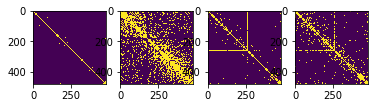

In [42]:
images = [
        (call4) > 0
        , (mit) > 0
        , (rl) > 0
        , (all) > 0
        ]
showImages(images, 1)

Number of columnts: 4


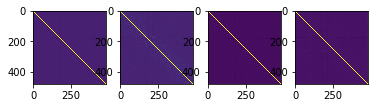

In [135]:
images = [
        np.log(call4+1)
        , np.log(mit+1)
        , np.log(rl+1)
        , np.log(all+1)
        ]
showImages(images, 1)

In [43]:
convertBinaryMatToOrcaReadable(call4 > 0, "data/chr%02d_chr%02d_call4.edges"%(chr1, chr1))
convertBinaryMatToOrcaReadable(mit > 0, "data/chr%02d_chr%02d_mit.edges"%(chr1, chr1))
convertBinaryMatToOrcaReadable(rl > 0, "data/chr%02d_chr%02d_rl.edges"%(chr1, chr1))
convertBinaryMatToOrcaReadable(all > 0, "data/chr%02d_chr%02d_all.edges"%(chr1, chr1))

In [54]:
os.system('Rscript rscript.r')

0

In [57]:
graphlets_mit = readMat("data/chr%02d_chr%02d_mit.graphlets"%(chr1, chr1), delimiter=" ").astype('uint32')
graphlets_all = readMat("data/chr%02d_chr%02d_all.graphlets"%(chr1, chr1), delimiter=" ").astype('uint32')
graphlets_rl = readMat("data/chr%02d_chr%02d_rl.graphlets"%(chr1, chr1), delimiter=" ").astype('uint32')
graphlets_call4 = readMat("data/chr%02d_chr%02d_call4.graphlets"%(chr1, chr1), delimiter=" ").astype('uint32')
print(graphlets_mit.shape)
print(graphlets_all.shape)
print(graphlets_rl.shape)
print(graphlets_call4.shape)

file directory: data/chr02_chr02_mit.graphlets
file directory: data/chr02_chr02_all.graphlets
file directory: data/chr02_chr02_rl.graphlets
file directory: data/chr02_chr02_call4.graphlets
(480, 15)
(480, 15)
(480, 15)
(480, 15)


In [122]:
mit_all_corr = \
    graphlet_correlational_distance(graphlets_mit, graphlets_all)

Number of columnts: 2


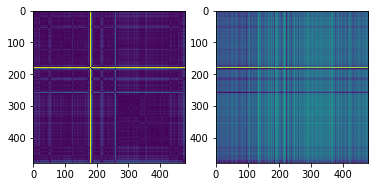

In [123]:
mit_mit_corr = \
    graphlet_correlational_distance(graphlets_mit, graphlets_mit)

In [125]:
mit_call4_corr = \
    graphlet_correlational_distance(graphlets_mit, graphlets_call4)

In [126]:
mit_rl_corr = \
    graphlet_correlational_distance(graphlets_mit, graphlets_rl)


Number of columnts: 2


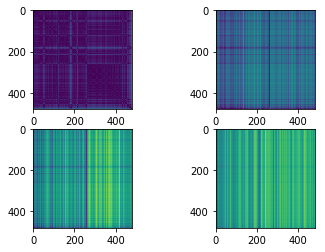

In [132]:
images = [ mit_mit_corr
          , mit_all_corr
         , mit_rl_corr
         , mit_call4_corr]
showImages(images, 2)

In [128]:
print_statistics(mit_mit_corr)
print_statistics(mit_all_corr)
print_statistics(mit_rl_corr)
print_statistics(mit_call4_corr)

#-----------------------------------------------------------------------#
Stats for : 
max: 1.691134 | min: 0.000000 | median: 0.071327 | mean: 0.107168 | std: 0.139136
#-----------------------------------------------------------------------#
#-----------------------------------------------------------------------#
Stats for : 
max: 1.597266 | min: 0.233179 | median: 0.699674 | mean: 0.697037 | std: 0.117772
#-----------------------------------------------------------------------#
#-----------------------------------------------------------------------#
Stats for : 
max: 1.746196 | min: 0.367605 | median: 1.133528 | mean: 1.136450 | std: 0.180942
#-----------------------------------------------------------------------#
#-----------------------------------------------------------------------#
Stats for : 
max: 2.749675 | min: 0.732718 | median: 1.948328 | mean: 1.936197 | std: 0.204041
#-----------------------------------------------------------------------#


(2.7496754158739174,
 0.7327179403781046,
 1.9361970800478632,
 0.20404056445751131)

In [140]:
print_statistics(np.diagonal(mit_mit_corr))
print_statistics(np.diagonal(mit_all_corr))
print_statistics(np.diagonal(mit_rl_corr))
print_statistics(np.diagonal(mit_call4_corr))

#-----------------------------------------------------------------------#
Stats for : 
max: 0.000000 | min: 0.000000 | median: 0.000000 | mean: 0.000000 | std: 0.000000
#-----------------------------------------------------------------------#
#-----------------------------------------------------------------------#
Stats for : 
max: 1.348437 | min: 0.307646 | median: 0.697144 | mean: 0.698602 | std: 0.116502
#-----------------------------------------------------------------------#
#-----------------------------------------------------------------------#
Stats for : 
max: 1.700592 | min: 0.524325 | median: 1.132104 | mean: 1.133471 | std: 0.195227
#-----------------------------------------------------------------------#
#-----------------------------------------------------------------------#
Stats for : 
max: 2.747789 | min: 1.109883 | median: 1.951710 | mean: 1.935659 | std: 0.206822
#-----------------------------------------------------------------------#


(2.747789005405226,
 1.1098830739665677,
 1.9356594946718233,
 0.20682164641656162)